# COTTON PRICE PREDICTION OF MAHARASHTRA(1 yr mah_1yr)

In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.9 MB/s eta 0:00:00


In [ ]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [ ]:
mah_1yr=pd.read_csv('maharashtra_1yr.csv')
mah_1yr

,DATE,VALUES
0,03-03-2022,9800
1,04-03-2022,9800
2,05-03-2022,9800
3,06-03-2022,9000
4,07-03-2022,9000
...,...,...
281,19-03-2023,7750
282,20-03-2023,7950
283,21-03-2023,7790
284,22-03-2023,7800


# EXPLORATORY ic_1yr ANALYSIS(EDA)

In [ ]:
#CHECKING SHAPE OF ic_1yrSET
mah_1yr.shape

(286, 2)

In [ ]:
#CHECKING NULL VALUES IN ic_1yrSET
mah_1yr.isnull().sum()

DATE      0
VALUES    0
dtype: int64

In [ ]:
#SINCE THE mah_1yrSET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
mah_1yr=mah_1yr.dropna()
mah_1yr

,DATE,VALUES
0,03-03-2022,9800
1,04-03-2022,9800
2,05-03-2022,9800
3,06-03-2022,9000
4,07-03-2022,9000
...,...,...
281,19-03-2023,7750
282,20-03-2023,7950
283,21-03-2023,7790
284,22-03-2023,7800


In [ ]:
mah_1yr.isnull().sum()

DATE      0
VALUES    0
dtype: int64

In [ ]:
#DESCIPTION OF mah_1yrSET
mah_1yr.describe()

,VALUES
count,286.000000
mean,9142.713287
std,1264.183343
min,6500.000000
25%,8150.000000
50%,8740.000000
75%,10437.500000
max,11700.000000


In [ ]:
#INFORMATION ABOUT mah_1yrSET
mah_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    286 non-null    object
 1   VALUES  286 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


In [ ]:
mah_1yr2 = mah_1yr.groupby('DATE')[['VALUES']].mean()


In [ ]:
mah_1yr2

,VALUES
DATE,
01-01-2023,8100.0
01-02-2023,8170.0
01-03-2023,8300.0
01-04-2022,11000.0
01-05-2022,11000.0
...,...
31-01-2023,8150.0
31-03-2022,9500.0
31-05-2022,11500.0


In [ ]:
type(mah_1yr.DATE[0])

str

# VISUALIZATION OF ic_1yrSET

Text(0, 0.5, 'Price')

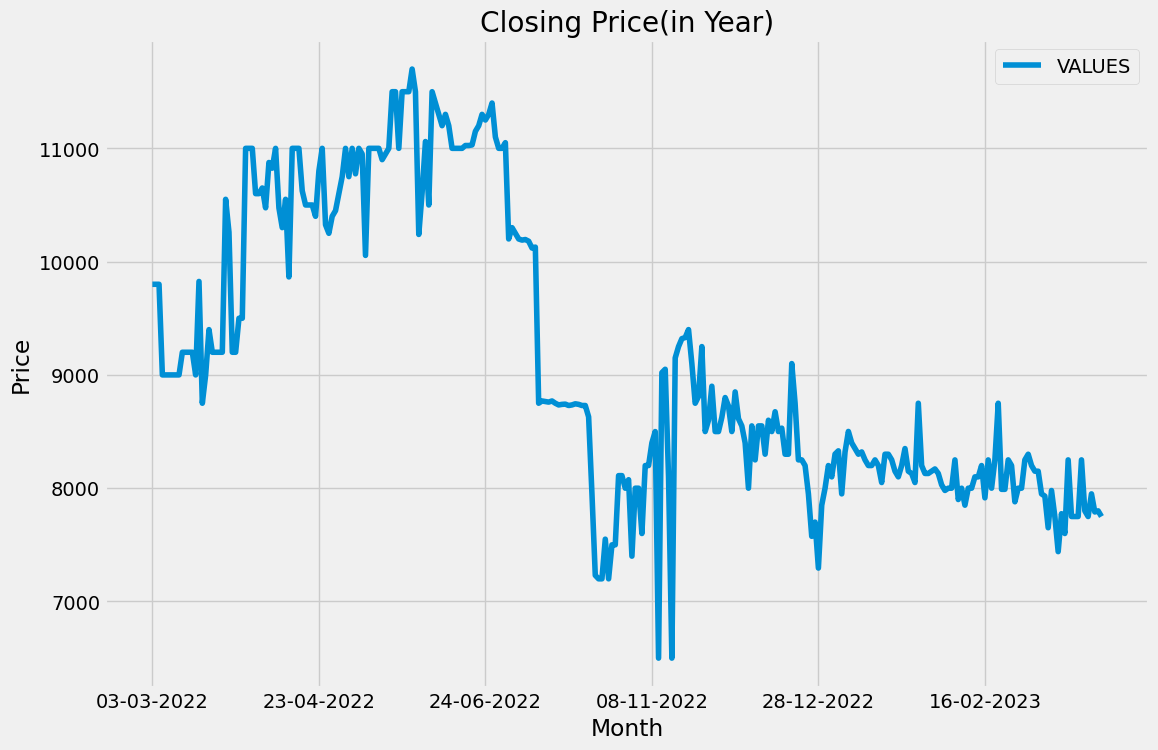

In [ ]:
#plotting the graph with date againts closing price(in month)
mah_1yr.plot(figsize=(12,8),x='DATE',y='VALUES',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [ ]:
mah_1yr2

,VALUES
DATE,
01-01-2023,8100.0
01-02-2023,8170.0
01-03-2023,8300.0
01-04-2022,11000.0
01-05-2022,11000.0
...,...
31-01-2023,8150.0
31-03-2022,9500.0
31-05-2022,11500.0


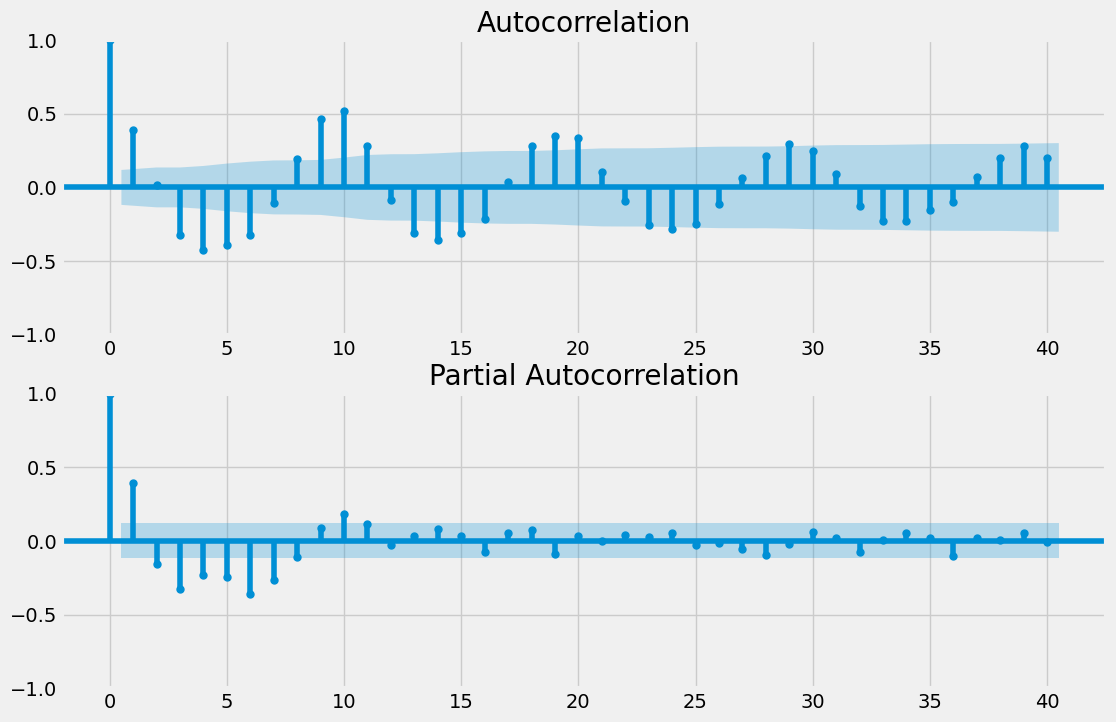

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mah_1yr2['VALUES'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mah_1yr2['VALUES'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [ ]:
test_result=adfuller(mah_1yr2['VALUES'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_1yr has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
mah_1yr2['VALUES First Difference'] = mah_1yr2['VALUES'] - mah_1yr2['VALUES'].shift(1)
mah_1yr2['VALUES'].shift(periods=1)


DATE
01-01-2023        NaN
01-02-2023     8100.0
01-03-2023     8170.0
01-04-2022     8300.0
01-05-2022    11000.0
               ...   
31-01-2023     8000.0
31-03-2022     8150.0
31-05-2022     9500.0
31-10-2022    11500.0
31-12-2022     8000.0
Name: VALUES, Length: 286, dtype: float64

ADF Test Statistic : -9.990985474585527
p-value : 1.9964913541067516e-17
#Lags Used : 13
Number of Observations Used : 271
strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_1yr has no unit root and is stationary


Text(0, 0.5, 'Price')

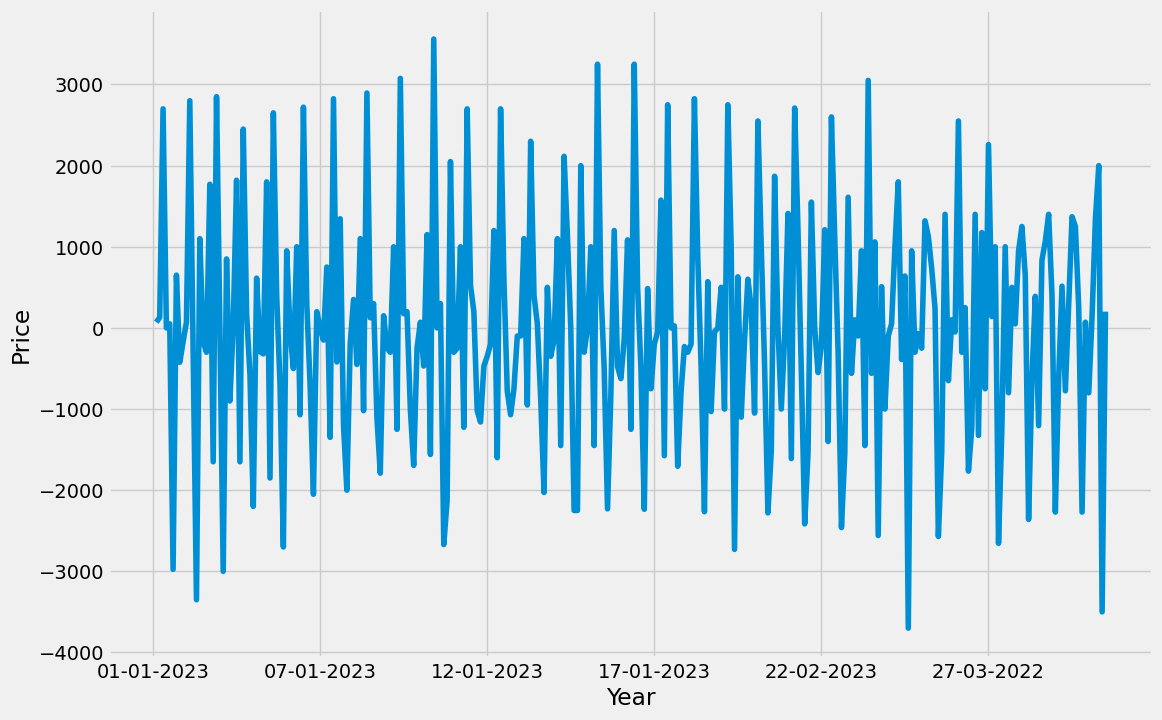

In [ ]:
adfuller_test(mah_1yr2['VALUES First Difference'].dropna())
mah_1yr2['VALUES First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [ ]:
stepwise_fit = auto_arima(mah_1yr2['VALUES'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4846.944, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4899.959, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4856.743, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4857.873, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6036.078, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4850.690, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4863.289, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4866.314, Time=0.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=4852.514, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4855.950, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=4852.284, Time=1.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4810.346, Time=0.69 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4820.231, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4800.107, Time=0.67 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept

In [ ]:
train_mah_1yr, test_mah_1yr = mah_1yr2[0:int(len(mah_1yr2)*0.7)], mah_1yr2[int(len(mah_1yr2)*0.7):]
training_mah_1yr = train_mah_1yr['VALUES'].values
test_mah_1yr = test_mah_1yr['VALUES'].values
history = [x for x in training_mah_1yr]
model_predictions = []
N_test_observations = len(test_mah_1yr)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_mah_1yr[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_mah_1yr, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 917190.2583267728


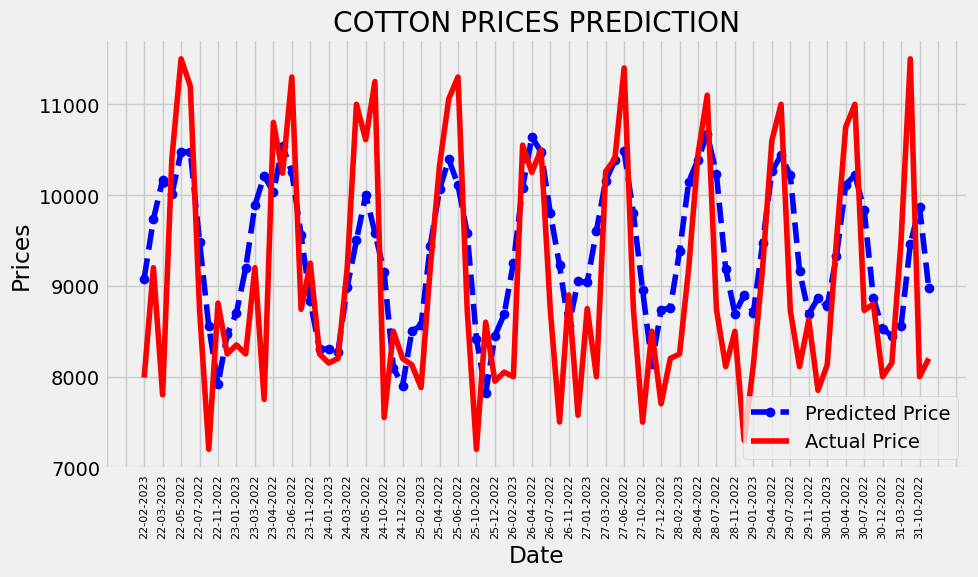

In [ ]:
test_set_range = mah_1yr2[int(len(mah_1yr2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_mah_1yr, color='red', label='Actual Price')
plt.title('COTTON PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), ic_1yr2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pred=model_fit.predict(start=len(mah_1yr2),end=len(mah_1yr2)+30,typ='levels')
print(pred)

[8990.39636486 9266.07817906 8803.12478212 9133.60473235 9235.18233311
 9328.68566697 9235.45403527 9217.08271298 9134.91608022 9076.79204833
 9037.99216861 9063.03003734 9109.73304214 9165.38718388 9202.17249776
 9213.11987946 9193.49415159 9157.08331295 9119.98521613 9097.93606247
 9096.97702184 9114.86725653 9141.69499764 9165.635711   9177.41759802
 9174.08541276 9159.04886844 9139.96535475 9125.00117903 9119.56928314
 9124.50687818]


In [ ]:
# model performance
mse = mean_squared_error(test_mah_1yr, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_mah_1yr,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_mah_1yr, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_mah_1yr)/np.abs(test_mah_1yr))
print('MAPE: '+str(mape))

MSE: 917190.2583267728
MAE: 783.5561327175584
RMSE: 957.7005055479364
MAPE: 0.09005599404888681
